In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("/Users/carlotacarvalho/Desktop/Ironhack/Github/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()
#uid - Unique identifier for each row.
#asin - Product ID from Amazon.
#title - Title of the product. 
#stars - Product rating. If 0, no ratings were found.
#reviews - Number of customer reviews. If 0, no reviews were found. 
#price - Price of the product.
#isBestSeller - Whether the product had the Amazon BestSeller status or not.
#boughtInLastMonth - Indicates how many products we sold last month.
#category - Product category.

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


# Part 1: Analyzing Best-Seller Trends Across Product Categories

### Crosstab Analysis 

In [4]:
crosstab_1=pd.crosstab(df.category, df.isBestSeller)
crosstab_1

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [5]:
category_counts = df.groupby('category')['isBestSeller'].agg(['sum', 'count'])
category_counts['percentage'] = (category_counts['sum'] / category_counts['count']) * 100
sorted_categories = category_counts['percentage'].sort_values(ascending=False)
sorted_categories

category
Grocery                             5.813467
Smart Home Security & Lighting      5.769231
Health & Personal Care              5.768628
Mobile Phone Accessories            4.247104
Power & Hand Tools                  3.533895
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: percentage, Length: 296, dtype: float64

###  Statistical Tests

In [6]:
from scipy.stats import chi2_contingency

In [7]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_1)
chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [8]:
from scipy.stats.contingency import association

In [9]:
association(crosstab_1, method="cramer")

0.1222829439760564

The Cramér's V value of 0.122 suggests a weak association between the two variables.

### Visualizations

<Axes: xlabel='category'>

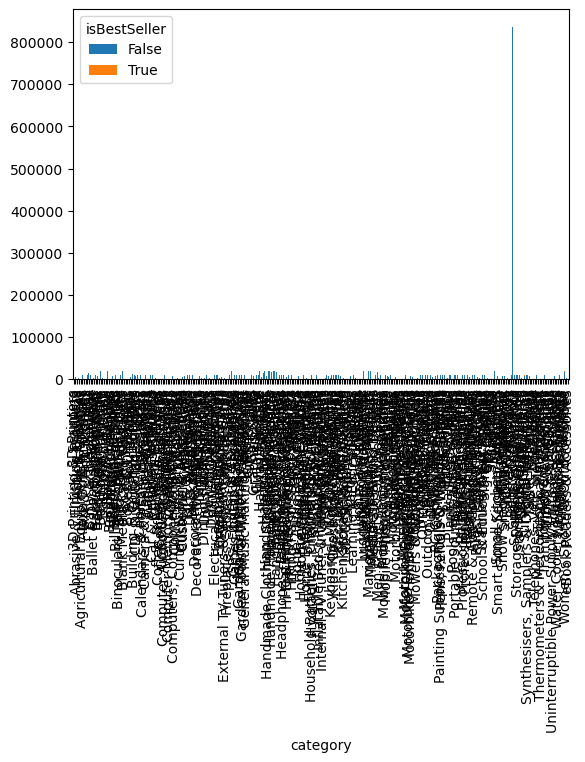

In [10]:
crosstab_1.plot(kind="bar", stacked=True)

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

### Preliminary Step: Remove outliers in product prices

In [11]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [12]:
df.shape

(2443651, 9)

In [13]:
df_no_outliers.shape

(2115963, 9)

### Violin Plots

<Axes: xlabel='category', ylabel='price'>

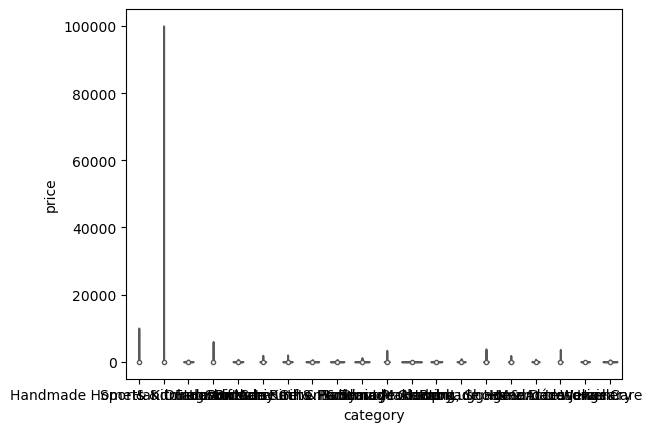

In [14]:
top_categories = df['category'].value_counts().nlargest(20).index
df_filtered = df[df['category'].isin(top_categories)]
sns.violinplot(x='category', y='price', data=df_filtered, palette='Set2')

In [15]:
median_prices = df.groupby('category')['price'].median()
highest_median_price_category = median_prices.idxmax()
highest_median_price = median_prices.max()
highest_median_price_category, highest_median_price

('Laptops', 1042.725)

### Bar Charts 

<Axes: xlabel='category'>

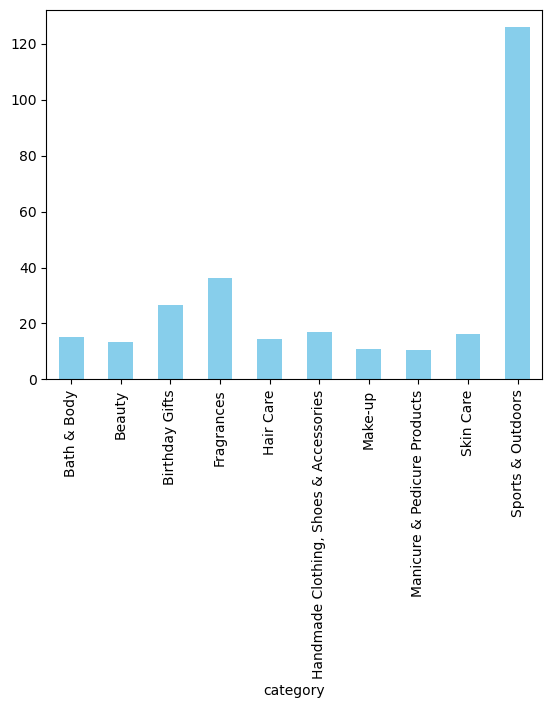

In [16]:
top_categories = df['category'].value_counts().nlargest(10).index
df_top_categories = df[df['category'].isin(top_categories)]
top_average_prices = df_top_categories.groupby('category')['price'].mean()
top_average_prices.plot(kind='bar', color='skyblue')

In [17]:
average_prices = df.groupby('category')['price'].mean()
highest_avg_price_category = average_prices.idxmax()
highest_avg_price = average_prices.max()
highest_avg_price_category, highest_avg_price

('Laptops', 1087.987826986755)

### Box Plots 

<Axes: xlabel='category', ylabel='stars'>

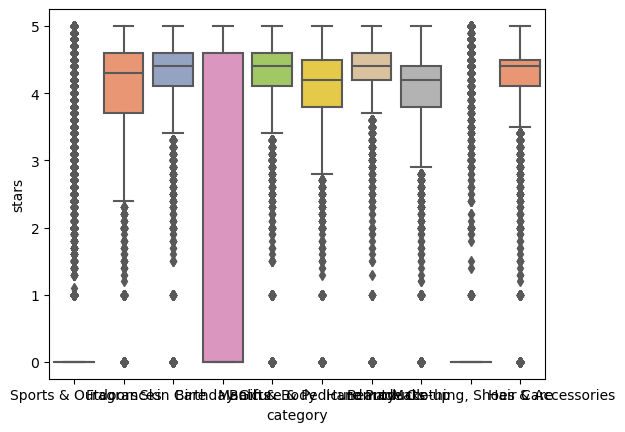

In [18]:
top_categories = df['category'].value_counts().nlargest(10).index
df_top_categories = df[df['category'].isin(top_categories)]
sns.boxplot(x='category', y='stars', data=df_top_categories, palette='Set2')

In [19]:
median_ratings = df.groupby('category')['stars'].median()
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()
highest_median_rating_category,highest_median_rating

('Computer Memory', 4.7)

# Investigating the Interplay Between Product Prices and Ratings

### Correlation Coefficients

In [20]:
coefficient = df['price'].corr(df['stars'])
coefficient

-0.1249067326214869

In [21]:
from scipy.stats import pearsonr

In [22]:
coefficient, p_value = pearsonr(df['price'], df['stars'])
coefficient, p_value

(-0.12490673262148805, 0.0)

In [23]:
if p_value < 0.05:
    print("There is a significant correlation between product price and its rating.")
else:
    print("There is no significant correlation between product price and its rating.")

There is a significant correlation between product price and its rating.


### Visualizations

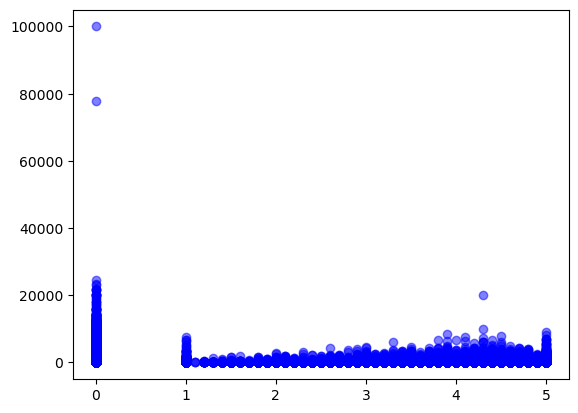

In [24]:
plt.scatter(df['stars'], df['price'], alpha=0.5, color='blue')

<Axes: >

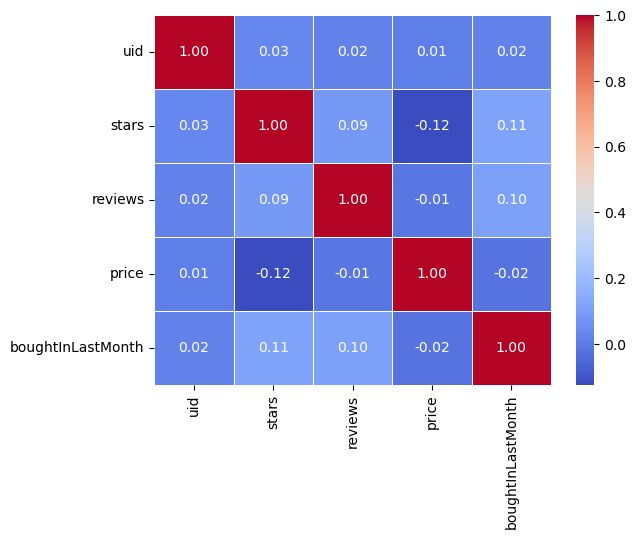

In [26]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [27]:
import statsmodels.api as sm

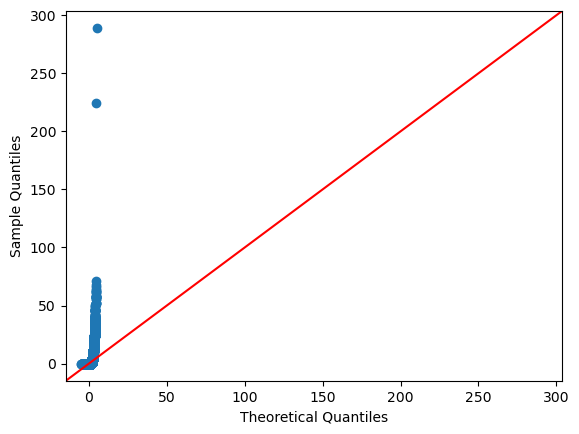

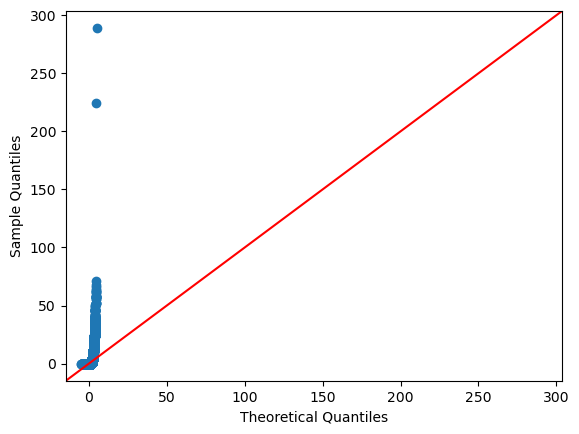

In [28]:
prices = df['price']
sm.qqplot(prices, line='45', fit=True)